<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Ass07_Hierarchical_Clustering(crime).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import Hierarchical Clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# **Load data set**

In [52]:
data = pd.read_csv('/content/crime_data.csv')

# **EDA**

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [54]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [55]:
data.shape

(50, 5)

#Renaming columns

In [56]:
data = data.rename({'Unnamed: 0':'State'},axis=1)

In [57]:
data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#Finding and romoving NA values

In [58]:
data.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

# **Some visualization**

array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

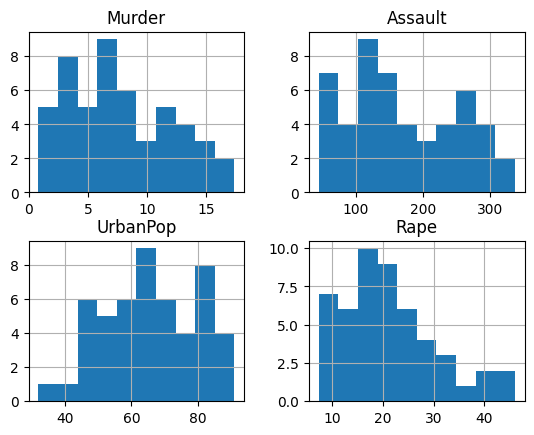

In [59]:
data.hist()

# **Customized Normalization function**

In [60]:
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return x

In [61]:
df_norm = norm_func(data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# **Create Dendrogram**

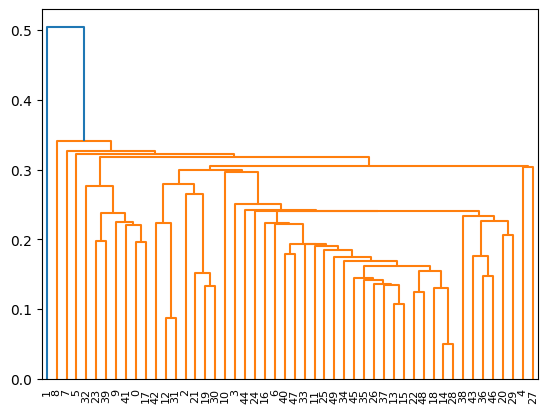

In [62]:
# single linkage method use
dendrogram = sch.dendrogram(sch.linkage(df_norm,method='single'))

In [63]:
hc = AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage = 'single')
hc

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=6)

In [64]:
# save cluster for chart
y_hc = hc.fit_predict(df_norm)
clusters = pd.DataFrame(y_hc,columns=['Cluster'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [71]:
data['Hierarchical_Cluster'].value_counts()

0    39
2     7
1     1
3     1
4     1
5     1
Name: Hierarchical_Cluster, dtype: int64

In [65]:
y_hc

array([2, 3, 0, 0, 0, 4, 0, 1, 5, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0])

In [66]:
clusters

,Cluster
0,2
1,3
2,0
3,0
4,0
5,4
6,0
7,1
8,5
9,2


In [67]:
# Adding cluster column in main data
data['Hierarchical_Cluster'] = clusters
data

,State,Murder,Assault,UrbanPop,Rape,Hierarchical_Cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,5
9,Georgia,17.4,211,60,25.8,2


In [68]:
data = data.sort_values('Hierarchical_Cluster') # sorting by asending order

In [69]:
data.iloc[:,[0,5]]

,State,Hierarchical_Cluster
24,Missouri,0
26,Nebraska,0
27,Nevada,0
28,New Hampshire,0
29,New Jersey,0
30,New Mexico,0
31,New York,0
33,North Dakota,0
34,Ohio,0
35,Oklahoma,0


# **END**